In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# read the data

filename = "AQUA_MODIS.20230101.L3m.DAY.POC.poc.4km.nc"
data = nc.Dataset(filename, "r")

print("=== GLOBAL ATTRIBUTES ===")
for attr in data.ncattrs():
    print(f"{attr}: {data.getncattr(attr)}")

print("\n=== DIMENSIONS ===")
for dim, dim_info in data.dimensions.items():
    print(f"{dim}: {len(dim_info)}")

print("\n=== VARIABLES ===")
for var, var_info in data.variables.items():
    print(f"{var}: {var_info}")

print("\n=== GROUPS ===")
for group in data.groups:
    print(group)

=== GLOBAL ATTRIBUTES ===
product_name: AQUA_MODIS.20230101.L3m.DAY.POC.poc.4km.nc
instrument: MODIS
title: MODISA Level-3 Standard Mapped Image
project: Ocean Biology Processing Group (NASA/GSFC/OBPG)
platform: Aqua
source: satellite observations from MODIS-Aqua
temporal_range: day
processing_version: R2022.0
date_created: 2023-03-01T22:14:31.000Z
history: l3mapgen par=AQUA_MODIS.20230101.L3m.DAY.POC.poc.4km.nc.param 
l2_flag_names: ATMFAIL,LAND,HILT,HISATZEN,STRAYLIGHT,CLDICE,COCCOLITH,LOWLW,CHLWARN,CHLFAIL,NAVWARN,MAXAERITER,ATMWARN,HISOLZEN,NAVFAIL,FILTER,HIGLINT
time_coverage_start: 2023-01-01T00:15:00.000Z
time_coverage_end: 2023-01-02T02:30:00.000Z
start_orbit_number: 109901
end_orbit_number: 109916
map_projection: Equidistant Cylindrical
latitude_units: degrees_north
longitude_units: degrees_east
northernmost_latitude: 90.0
southernmost_latitude: -90.0
westernmost_longitude: -180.0
easternmost_longitude: 180.0
geospatial_lat_max: 90.0
geospatial_lat_min: -90.0
geospatial_lon_ma

In [3]:
# read the data
data = nc.Dataset(filename, "r")

# read latitude, longitude and poc data
latitude = data.variables['lat'][:]
longitude = data.variables['lon'][:]
poc_data = data.variables['poc'][:]

# replace fill values with NaN for better plotting
fill_value = data.variables['poc']._FillValue
poc_data = np.where(poc_data == fill_value, np.nan, poc_data)

# apply the scale_factor and add_offset
scale_factor = data.variables['poc'].scale_factor
add_offset = data.variables['poc'].add_offset
poc_data = poc_data * scale_factor + add_offset

# plot data
plt.figure(figsize=(12, 6))
plt.pcolormesh(longitude, latitude, poc_data)
plt.colorbar(label='Particulate Organic Carbon (mg m^-3)')
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Latitude (degrees north)')
plt.title('MODISA Level-3 Standard Mapped Image for POC')
plt.savefig('modis_poc.png')
plt.close()



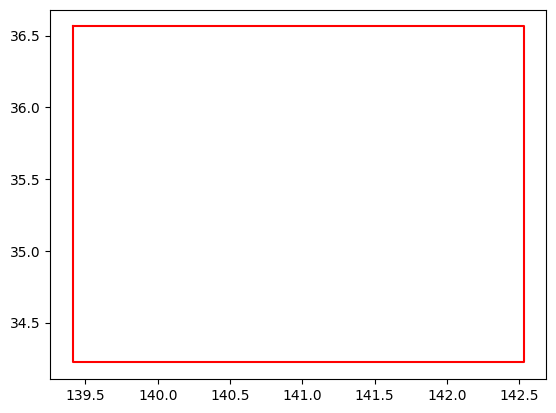

In [4]:
# read and plot the GeoJSON file
geojson_file = 'map.geojson'  # replace with your GeoJSON file path
gdf = gpd.read_file(geojson_file)

for polygon in gdf.geometry:
    x,y = polygon.exterior.xy
    plt.plot(x, y, color="red")  # adjust the color as you like

# to zoom into the region covered by the GeoJSON file
x_min, y_min, x_max, y_max = gdf.total_bounds

# plot data
plt.figure(figsize=(12, 6))
plt.pcolormesh(longitude, latitude, poc_data)
plt.colorbar(label='Particulate Organic Carbon (mg m^-3)')
plt.xlabel('Longitude (degrees east)')
plt.ylabel('Latitude (degrees north)')
plt.title('MODISA Level-3 Standard Mapped Image for POC')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.savefig('modis_poc_crop.png')
plt.close()